* Firstly, download data from http://www.timeseriesclassification.com (UCR data)
* Then select any dataset (in this notebook TRACE is used)


In [0]:
# !pip install sktime

In [0]:
# !pip install tsfresh

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.utils.load_data import load_from_tsfile_to_dataframe

In [0]:
def read_dataset(path):
  """
  Represents TS in the format of DataFrame with features: id, time, val
  - id corresponts to a particular TS
  - time - range from 0 to length of time series
  - val - series values
  (this format is necessary for tsfresh feature extraction)
  """
  raw_data, target = load_from_tsfile_to_dataframe(path)
  number_of_series = raw_data.shape[0]
  len_of_series = raw_data['dim_0'][0].shape[0]
  print('Number of series = %d, length of series = %d' % (number_of_series, len_of_series))
  print('Number of classes = %d' % len(np.unique(target)))

  data = pd.DataFrame(np.zeros((number_of_series * len_of_series, 3)), 
                      columns=['id', 'time', 'val'])
    
  for series_id in range(number_of_series):
    # boarders for rows in data
    low = series_id * len_of_series
    high = (series_id + 1) * len_of_series
    # fill data with values: id, time, val
    data['id'][low:high] = series_id * np.ones(len_of_series) 
    data['time'][low:high] = np.arange(0, len_of_series)
    data['val'][low:high] = raw_data['dim_0'][series_id].values

  return data, target

In [0]:
path = 'drive/My Drive/Colab Notebooks/ML/Trace_TRAIN.ts'
X_train, y_train = read_dataset(path)
print(X_train.shape)
print(y_train.shape)

Number of series = 100, length of series = 275
Number of classes = 4
(27500, 3)
(100,)


In [0]:
X_train.head(3)

id  time       val
0  0.0   0.0  0.544070
1  0.0   1.0  0.657863
2  0.0   2.0  0.611239

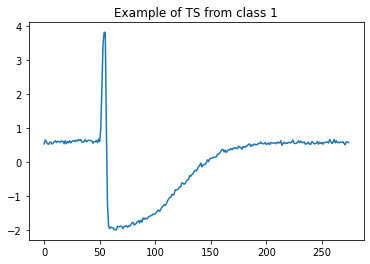

In [0]:
plt.plot(X_train[X_train['id'] == 0]['val'])
plt.title("Example of TS from class %s" % y_train[0])
plt.show()

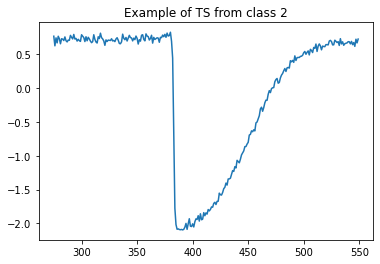

In [0]:
plt.plot(X_train[X_train['id'] == 1]['val'])
plt.title("Example of TS from class %s" % y_train[1])
plt.show()

In [0]:
# follow https://tsfresh.readthedocs.io/en/latest/text/quick_start.html
from tsfresh import extract_features
extracted_features = extract_features(X_train, column_id="id", column_sort="time")
extracted_features.shape

Feature Extraction: 100%|██████████| 5/5 [00:27<00:00,  5.49s/it]


(100, 756)

In [0]:
extracted_features.head(3)

variable  val__abs_energy  ...  val__variance_larger_than_standard_deviation
id                         ...                                              
0.0            273.999998  ...                                           0.0
1.0            274.000000  ...                                           0.0
2.0            273.999998  ...                                           0.0

[3 rows x 756 columns]

In [0]:
# remove all NaN values and select only the relevant features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y_train)
features_filtered.shape

(100, 612)

In [0]:
# perform the extraction, imputing and filtering AT THE SAME TIME 
from tsfresh import extract_relevant_features
features_filtered_direct = extract_relevant_features(X_train, pd.Series(y_train),
                                                     column_id='id', column_sort='time')
features_filtered_direct.shape

Feature Extraction: 100%|██████████| 5/5 [00:27<00:00,  5.47s/it]


(100, 612)